In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\banking_data.csv")
df

,age,job,marital,marital_status,education,default,balance,housing,loan,contact,day,month,day_month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,married,tertiary,no,2143,yes,no,unknown,5,may,5-May,261,1,-1,0,unknown,no
1,44,technician,single,single,secondary,no,29,yes,no,unknown,5,may,5-May,151,1,-1,0,unknown,no
2,33,entrepreneur,married,married,secondary,no,2,yes,yes,unknown,5,may,5-May,76,1,-1,0,unknown,no
3,47,blue-collar,married,married,unknown,no,1506,yes,no,unknown,5,may,5-May,92,1,-1,0,unknown,no
4,33,unknown,single,single,unknown,no,1,no,no,unknown,5,may,5-May,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45211,29,management,single,single,tertiary,no,765,no,no,cellular,16,nov,16-Nov,238,1,-1,0,unknown,yes
45212,68,retired,married,married,secondary,no,1146,no,no,cellular,16,nov,16-Nov,212,1,187,6,success,yes
45213,53,management,married,married,tertiary,no,583,no,no,cellular,17,nov,17-Nov,226,1,184,4,success,yes
45214,73,retired,married,married,secondary,no,2850,no,no,cellular,17,nov,17-Nov,300,1,40,8,failure,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45216 entries, 0 to 45215
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45216 non-null  int64 
 1   job             45216 non-null  object
 2   marital         45213 non-null  object
 3   marital_status  45213 non-null  object
 4   education       45213 non-null  object
 5   default         45216 non-null  object
 6   balance         45216 non-null  int64 
 7   housing         45216 non-null  object
 8   loan            45216 non-null  object
 9   contact         45216 non-null  object
 10  day             45216 non-null  int64 
 11  month           45216 non-null  object
 12  day_month       45216 non-null  object
 13  duration        45216 non-null  int64 
 14  campaign        45216 non-null  int64 
 15  pdays           45216 non-null  int64 
 16  previous        45216 non-null  int64 
 17  poutcome        45216 non-null  object
 18  y     

In [4]:
df.isnull().sum()

age               0
job               0
marital           3
marital_status    3
education         3
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

In [5]:
df=df.dropna()
df.isnull().sum()

age               0
job               0
marital           0
marital_status    0
education         0
default           0
balance           0
housing           0
loan              0
contact           0
day               0
month             0
day_month         0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
y                 0
dtype: int64

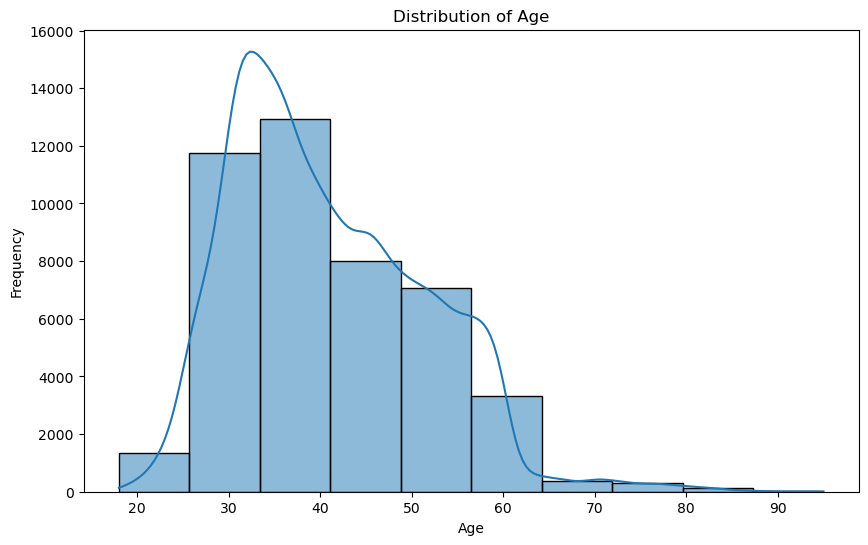

In [6]:
#-What is the distribution of age among the clients?
plt.figure(figsize=(10, 6))
sns.histplot(df['age'],bins=10,kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

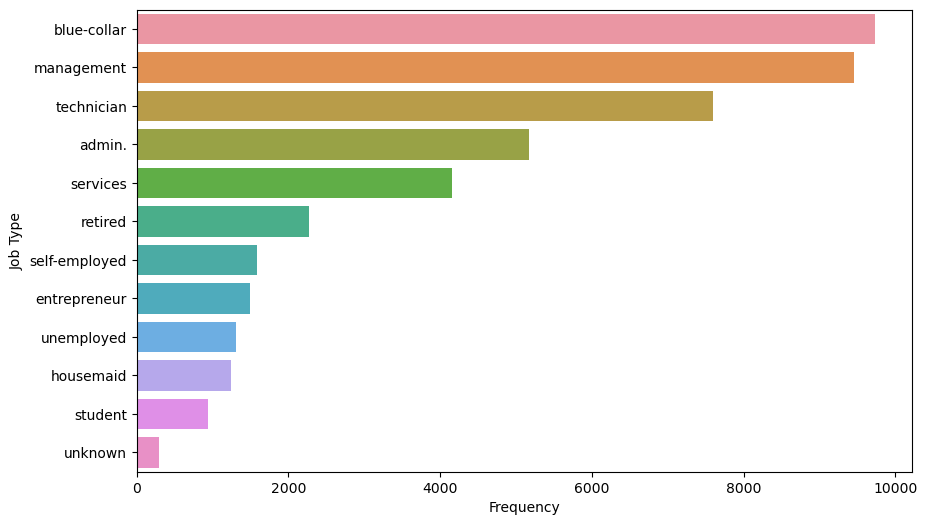

In [19]:
#How does the job type vary among the clients?
plt.figure(figsize=(10,6))
sns.countplot(y='job',data=df,order=df['job'].value_counts().index)
plt.xlabel('Frequency')
plt.ylabel('Job Type')
plt.show()

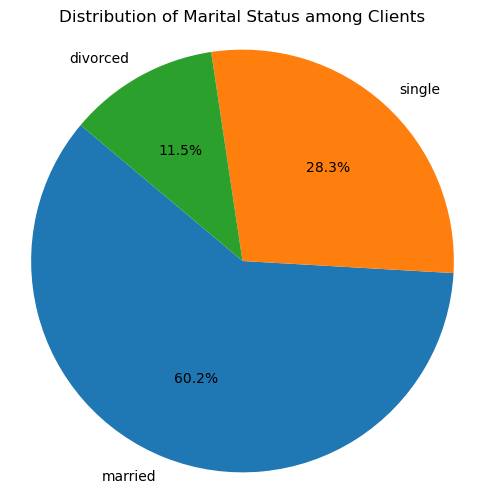

In [21]:
#What is the marital status distribution of the clients?
marital_status=df['marital_status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(marital_status,labels=marital_status.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Marital Status among Clients')
plt.axis('equal')  
plt.show()

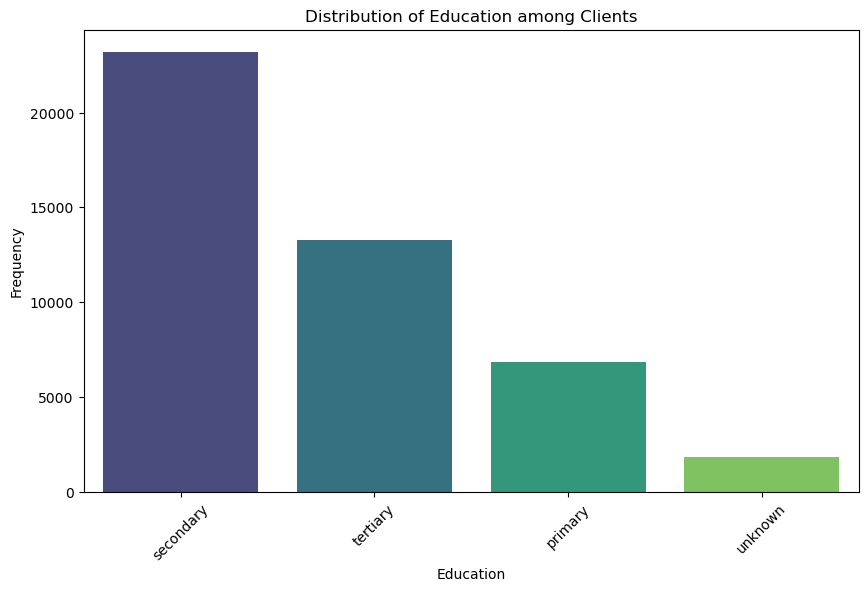

In [23]:
#What is the level of education among the clients?
education=df['education'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=education.index, y=education.values, palette='viridis')
plt.title('Distribution of Education among Clients')
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

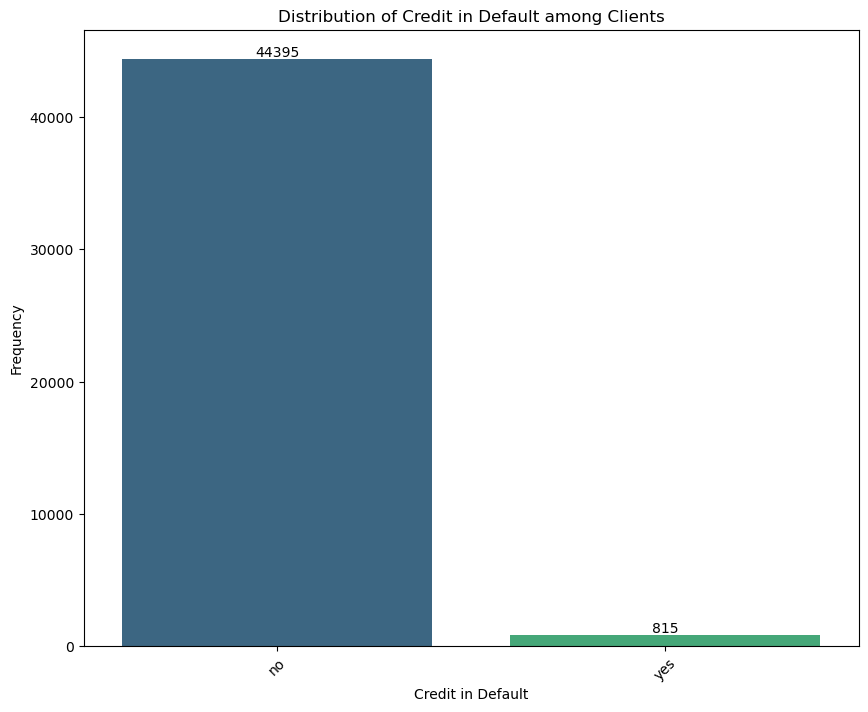

In [29]:
#What proportion of clients have credit in default?
credit=df['default'].value_counts()
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=credit.index, y=credit.values, palette='viridis')
plt.title('Distribution of Credit in Default among Clients')
plt.xlabel('Credit in Default')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
for i in range(len(credit)):
    barplot.text(i, credit.values[i] + 0.1, str(credit.values[i]), ha='center', va='bottom')
plt.show()

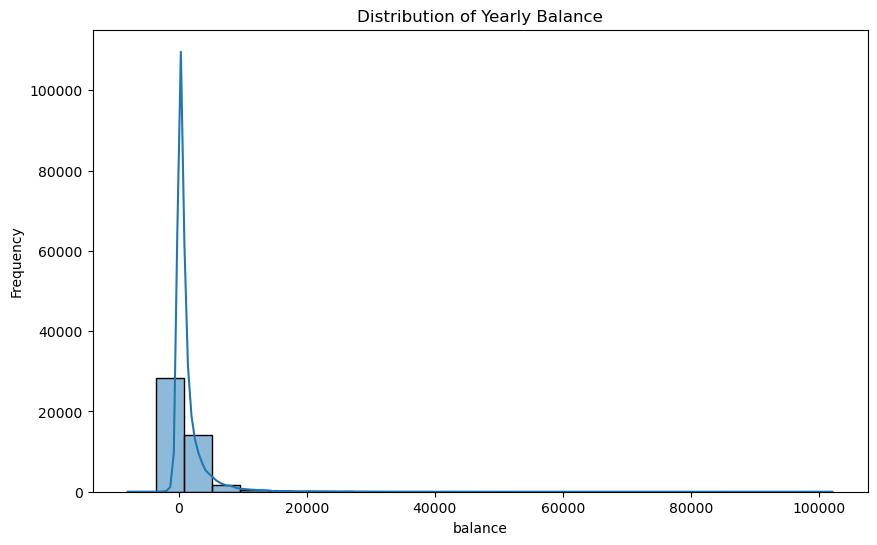

In [45]:
#-What is the distribution of average yearly balance among the clients?
plt.figure(figsize=(10, 6))
sns.histplot(df['balance'],bins=25,kde=True)
plt.title('Distribution of Yearly Balance')
plt.xlabel('balance')
plt.ylabel('Frequency')
plt.show()

In [41]:
df['balance'].mean()

1362.3330236673303

Text(0, 0.5, 'Number of Clients')

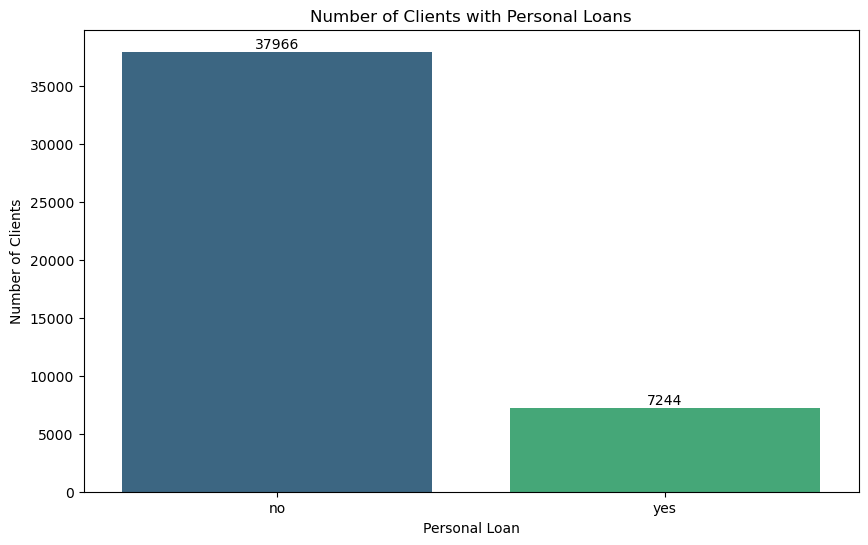

In [13]:
# -	How many clients have personal loans?
pl=df['loan'].value_counts()
plt.figure(figsize=(10, 6))
ba=sns.barplot(x=pl.index, y=pl.values, data=df, palette='viridis')
plt.title('Number of Clients with Personal Loans')
plt.xlabel('Personal Loan')
for i in range(len(pl)):
    ba.text(i, pl.values[i] + 0.1, str(pl.values[i]), ha='center', va='bottom')
plt.ylabel('Number of Clients')

Text(0, 0.5, 'Number of Clients')

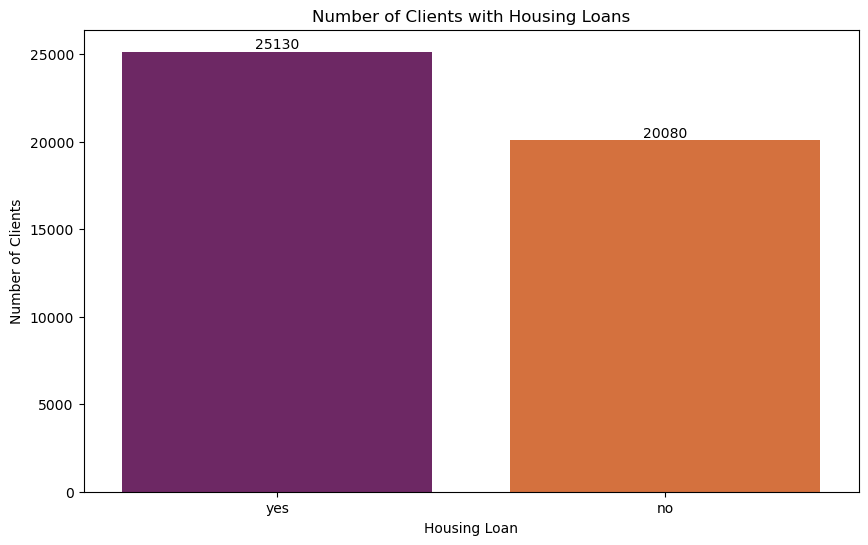

In [18]:
# -	How many clients have housing loans?
hl=df['housing'].value_counts()
plt.figure(figsize=(10, 6))
ba=sns.barplot(x=hl.index, y=hl.values, data=df, palette='inferno')
plt.title('Number of Clients with Housing Loans')
plt.xlabel('Housing Loan')
for i in range(len(hl)):
    ba.text(i, hl.values[i] + 0.1, str(hl.values[i]), ha='center', va='bottom')
plt.ylabel('Number of Clients')

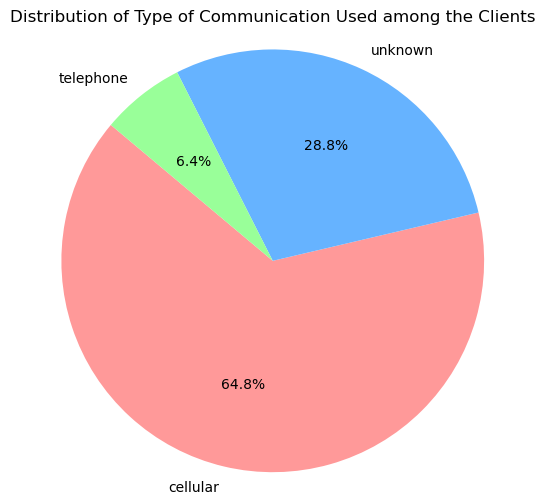

In [19]:
#-What are the communication types used for contacting clients during the campaign?
com=df['contact'].value_counts()
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.figure(figsize=(6,6))
plt.pie(com,labels=com.index,autopct='%1.1f%%',colors=colors, startangle=140)
plt.title('Distribution of Type of Communication Used among the Clients')
plt.axis('equal')  
plt.show()

([<matplotlib.axis.XTick at 0x20e7ed5aa50>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31')])

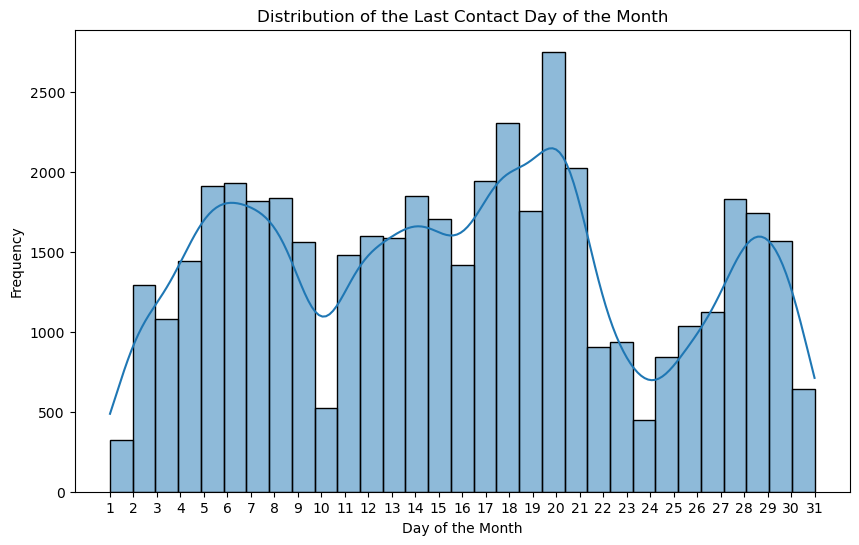

In [21]:
#-	What is the distribution of the last contact day of the month?
plt.figure(figsize=(10, 6))
sns.histplot(df['day'], bins=31, kde=True)
plt.title('Distribution of the Last Contact Day of the Month')
plt.xlabel('Day of the Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 32))

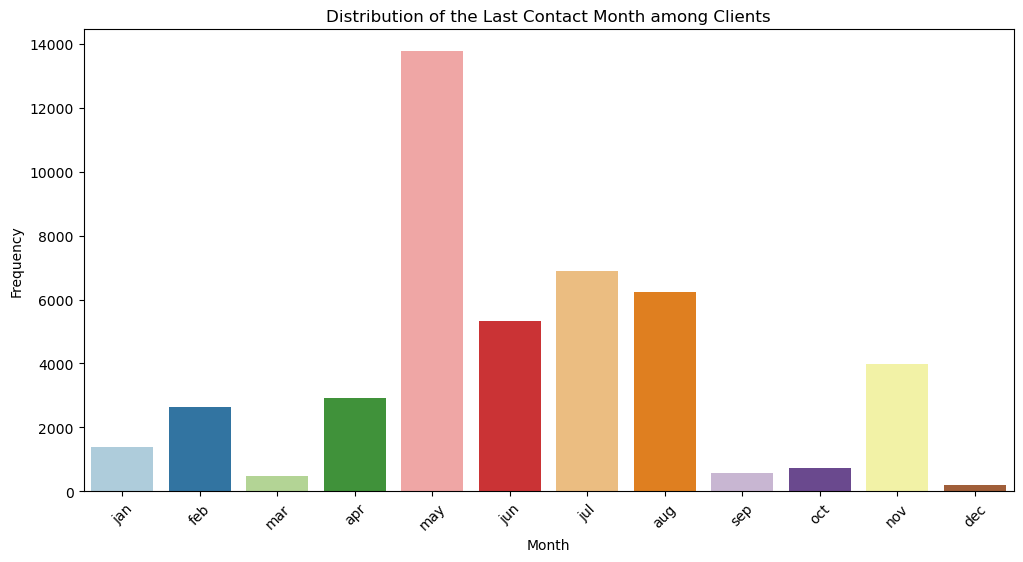

In [24]:
#-	How does the last contact month vary among the clients?
month_counts = df['month'].value_counts().sort_index()
months_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, order=months_order, palette='Paired')
plt.title('Distribution of the Last Contact Month among Clients')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45) 
plt.show()

258.15534173855343


C:\Users\adars\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

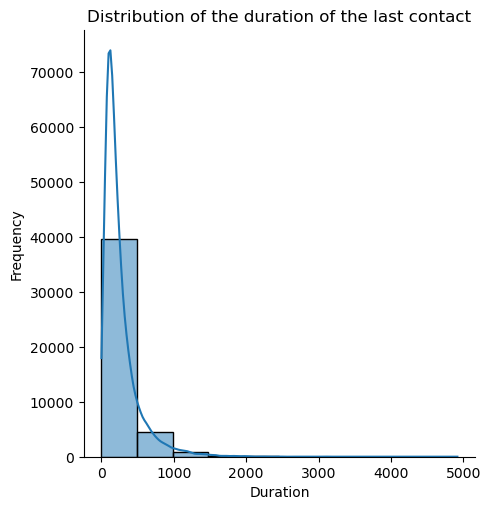

In [11]:
#-	What is the distribution of the duration of the last contact?
plt.figure(figsize=(10,6))
sns.displot(df['duration'], bins=10,kde=True)
plt.title('Distribution of the duration of the last contact')
plt.xlabel('Duration')
plt.ylabel('Frequency')
print(df['duration'].mean())

258.15534173855343


C:\Users\adars\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 500x600 with 0 Axes>

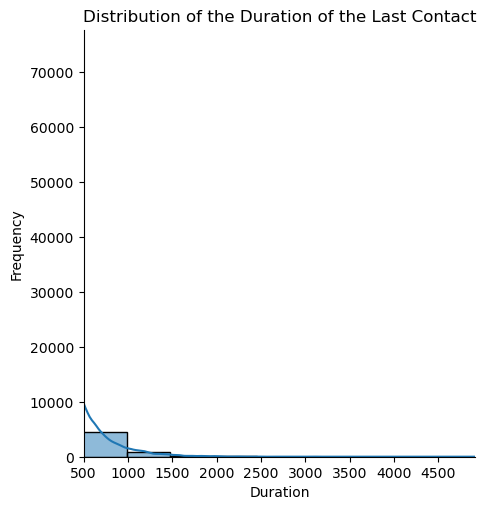

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 6))
sns.displot(df['duration'], bins=10, kde=True)
plt.title('Distribution of the Duration of the Last Contact')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.xlim(500, df['duration'].max())  # Set the x-axis to start at 500
print(df['duration'].mean())
plt.show()


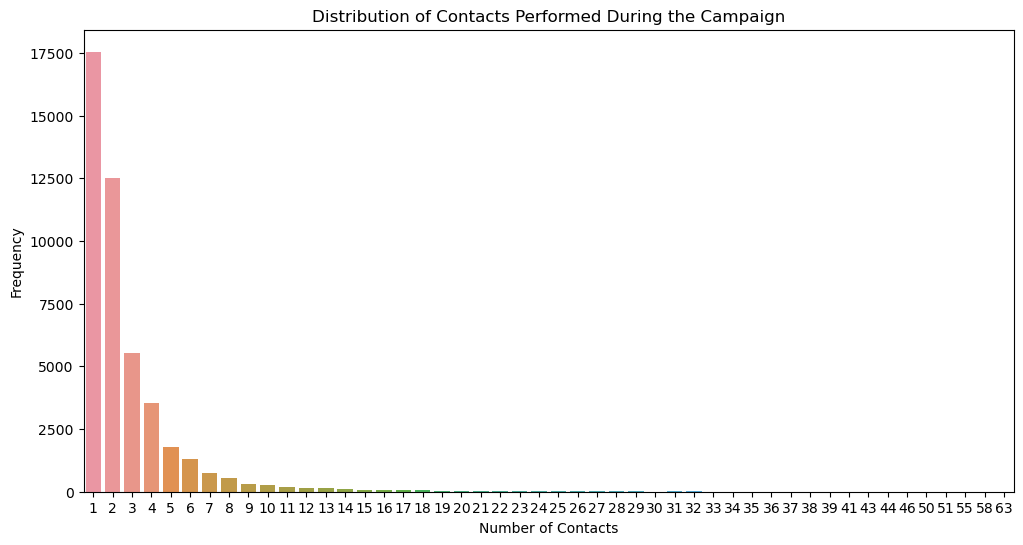

In [36]:
#-	How many contacts were performed during the campaign for each client?
campaign_counts = df['campaign'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=campaign_counts.index, y=campaign_counts.values)
plt.title('Distribution of Contacts Performed During the Campaign')
plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_18960\981777743.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['pdays'], bins=30,palette='Paired')


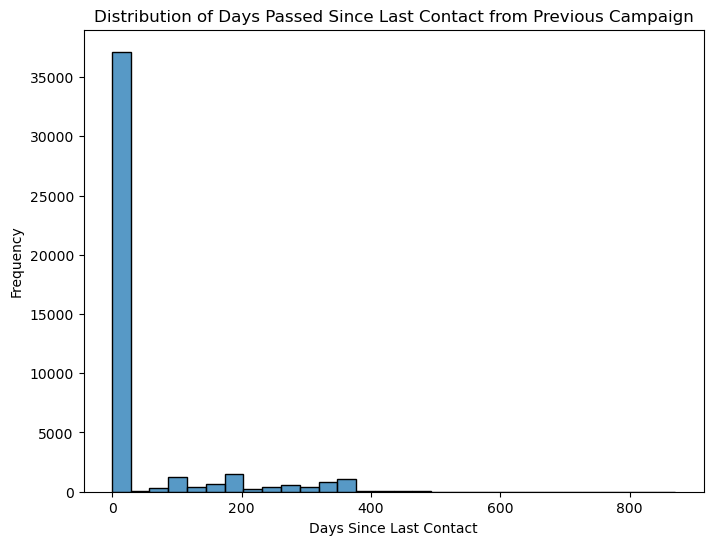

In [45]:
#-	What is the distribution of the number of days passed since the client was last contacted from a previous campaign?
plt.figure(figsize=(8, 6))
sns.histplot(df['pdays'], bins=30,palette='Paired')
plt.title('Distribution of Days Passed Since Last Contact from Previous Campaign')
plt.xlabel('Days Since Last Contact')
plt.ylabel('Frequency')
plt.show()

C:\Users\adars\AppData\Local\Temp\ipykernel_18960\2890168936.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['previous'], bins=30,palette='Paired')


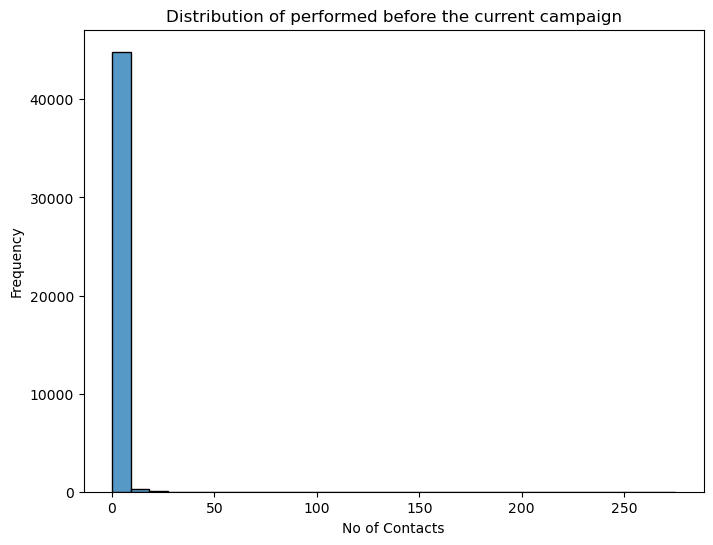

In [48]:
#-	How many contacts were performed before the current campaign for each client?
plt.figure(figsize=(8, 6))
sns.histplot(df['previous'], bins=30,palette='Paired')
plt.title('Distribution of performed before the current campaign')
plt.xlabel('No of Contacts')
plt.ylabel('Frequency')
plt.show()

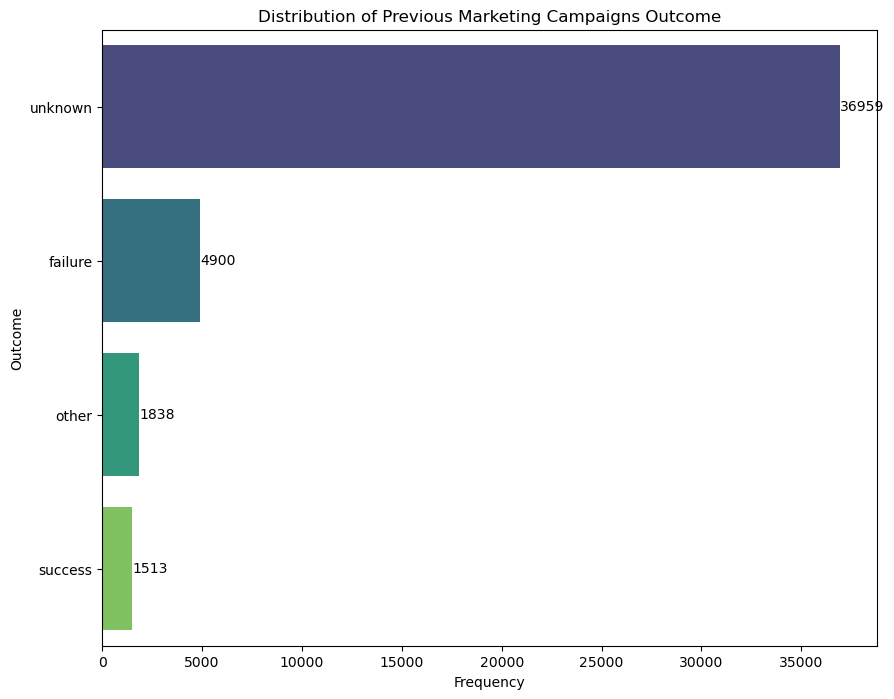

In [53]:
#-	What were the outcomes of the previous marketing campaigns?
out = df['poutcome'].value_counts()
plt.figure(figsize=(10, 8))
ba = sns.barplot(x=out.values, y=out.index, palette='viridis') 
plt.title('Distribution of Previous Marketing Campaigns Outcome')
plt.xlabel('Frequency')
plt.ylabel('Outcome')
for i in range(len(out)):
    ba.text(out.values[i] + 0.1, i, str(out.values[i]), ha='left', va='center')
plt.show()

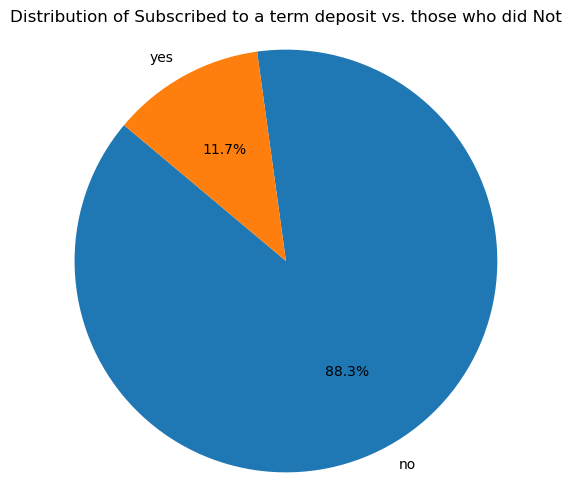

In [56]:
#-	What is the distribution of clients who subscribed to a term deposit vs. those who did not?
status=df['y'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status,labels=status.index,autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Subscribed to a term deposit vs. those who did Not')
plt.axis('equal')  
plt.show()

In [57]:
#-	Are there any correlations between different attributes and the likelihood of subscribing to a term deposit?
df['y']=df['y'].map({'yes':1,'no':0})
df['y']

C:\Users\adars\AppData\Local\Temp\ipykernel_18960\1347941748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y']=df['y'].map({'yes':1,'no':0})


In [60]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'y'],
      dtype='object')

In [61]:
correlations = df[numeric_cols].corr()['y'].drop('y')
print("Correlations with 'subscribed':")
print(correlations)

Correlations with 'subscribed':
age         0.025718
balance     0.052844
day        -0.028264
duration    0.394472
campaign   -0.073277
pdays       0.103813
previous    0.093628
Name: y, dtype: float64


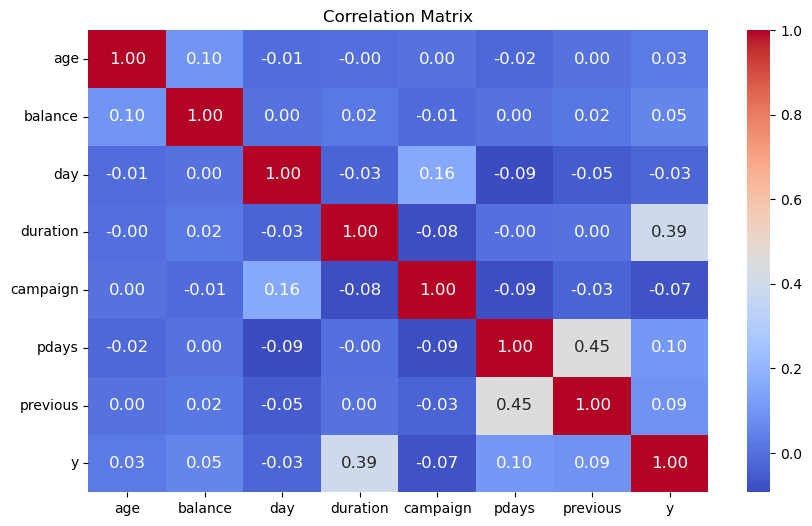

In [62]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()

C:\Users\adars\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


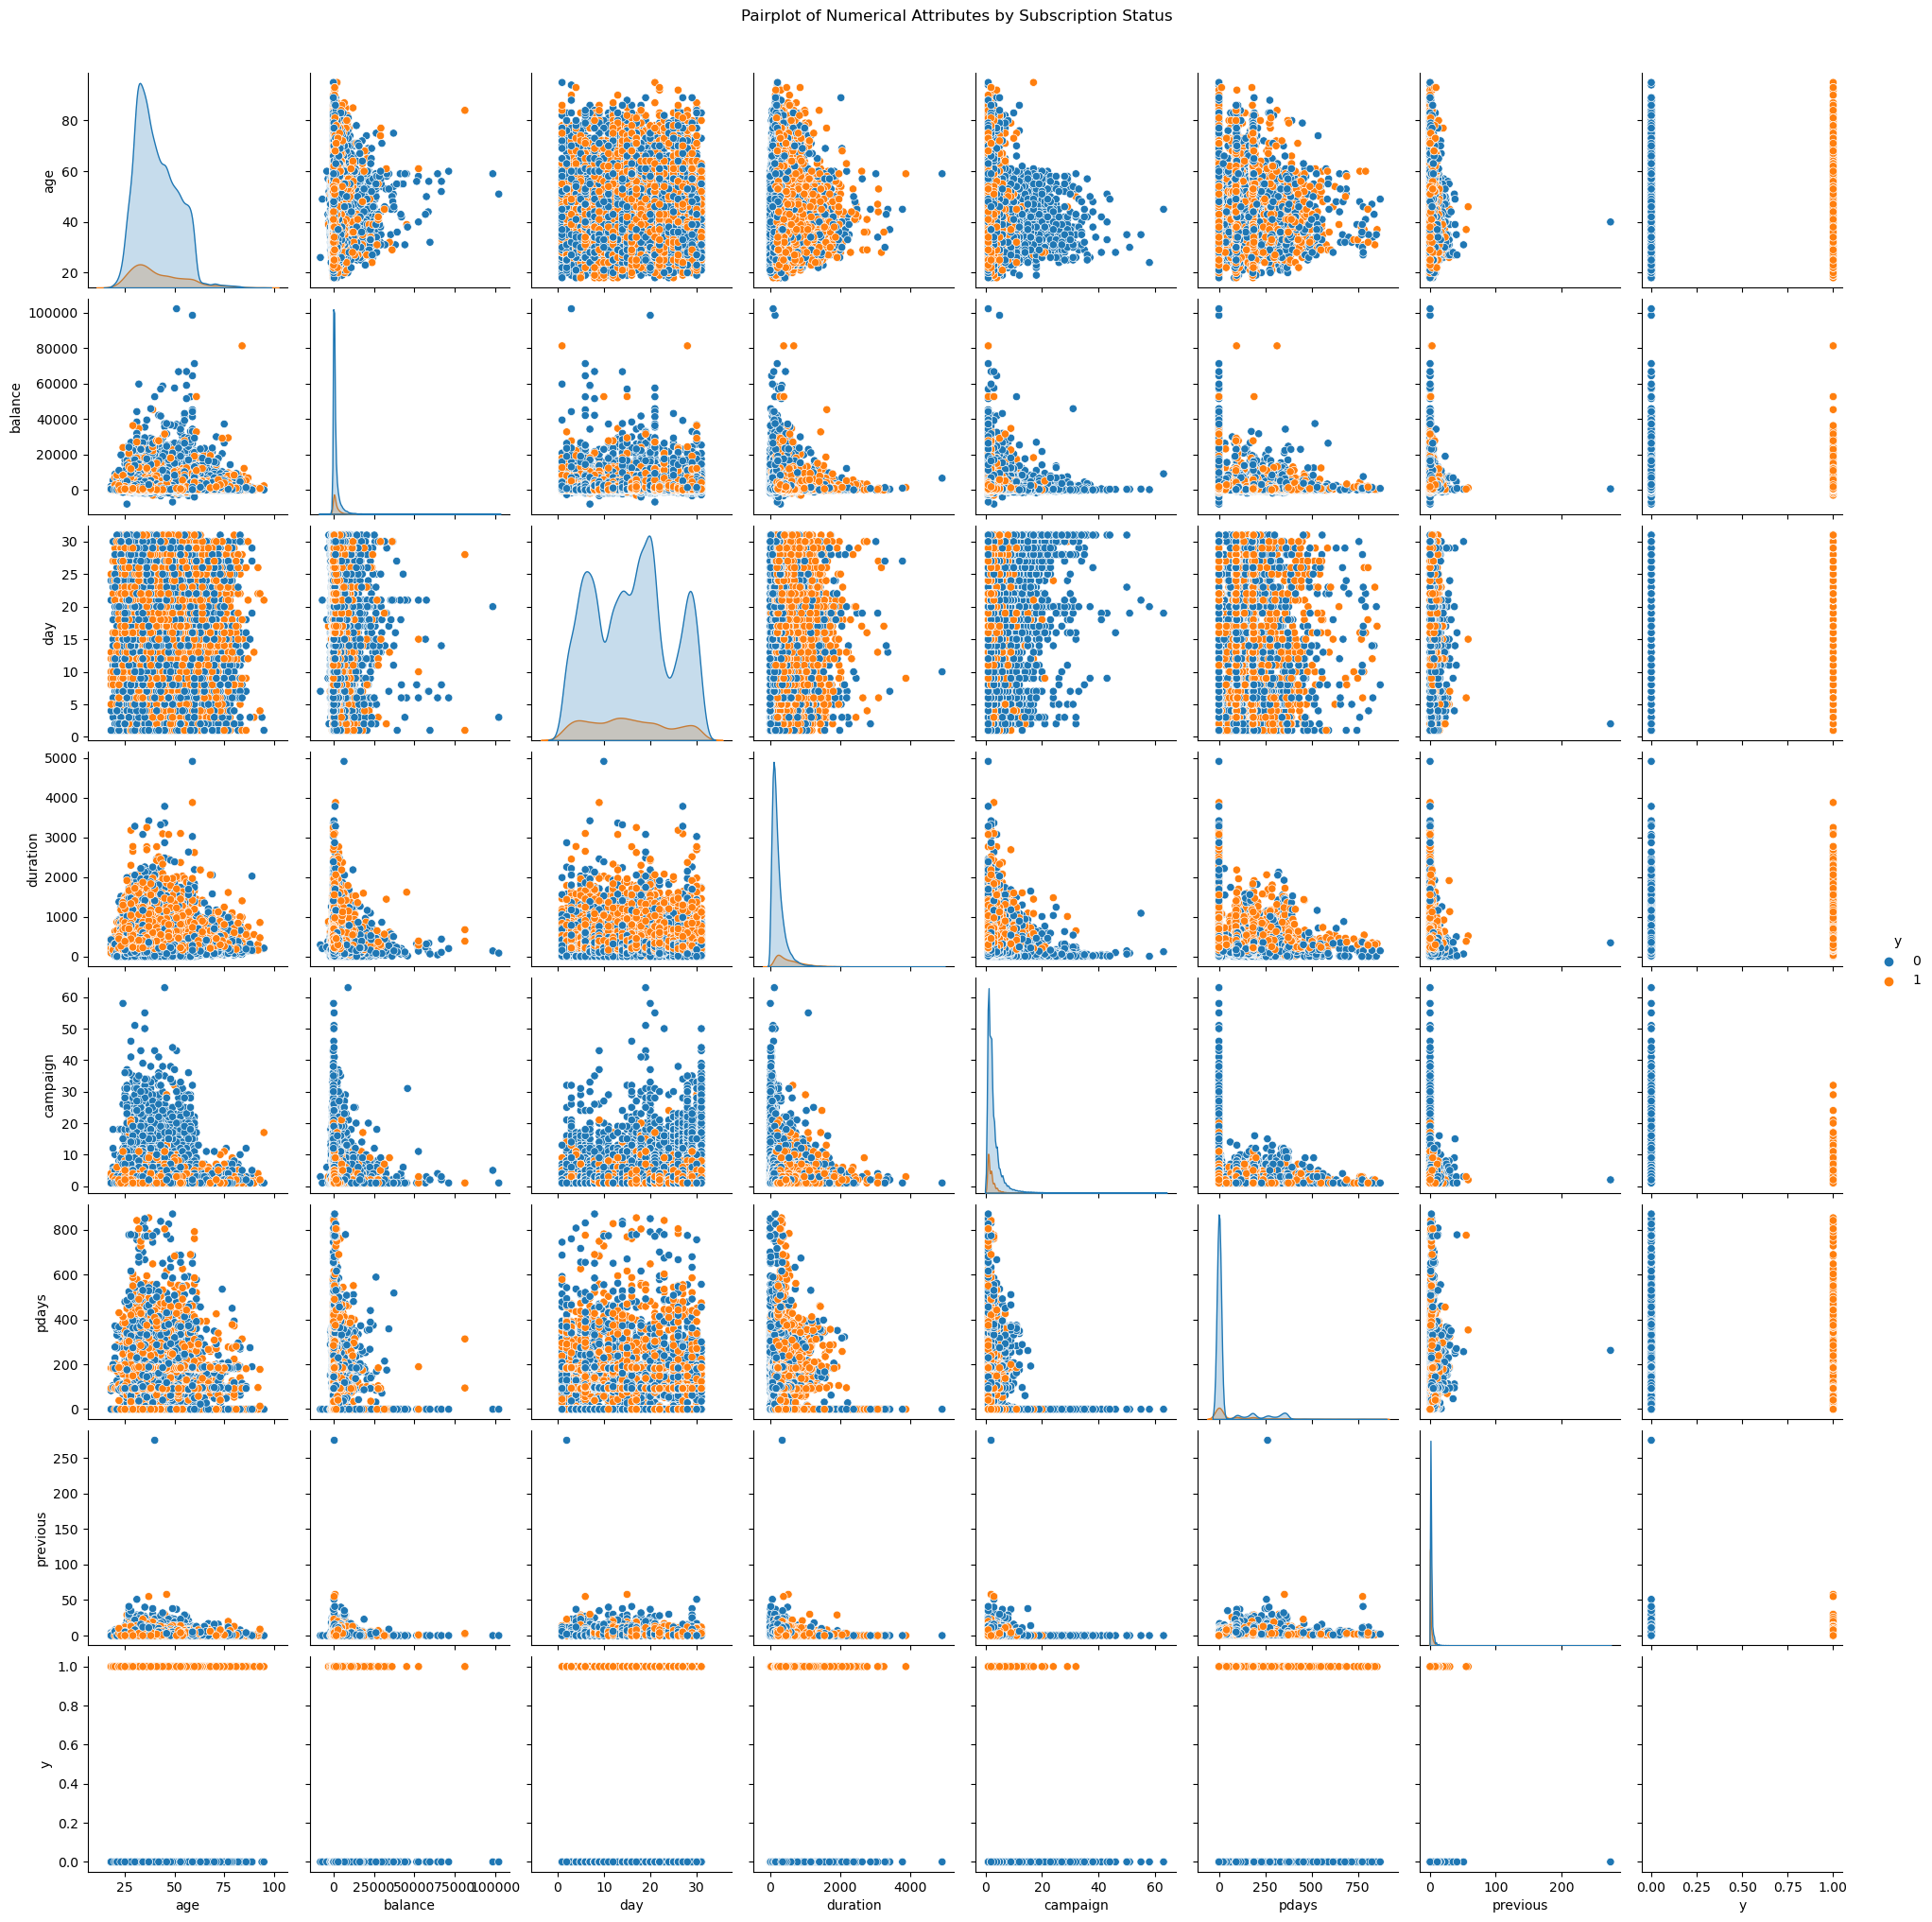

In [64]:
sns.pairplot(df, hue='y', vars=numeric_cols)
plt.suptitle('Pairplot of Numerical Attributes by Subscription Status', y=1.02)
plt.show()

Duration of the last contact has the highest correlation (0.394472) with subscription, indicating that longer conversations during the campaign tend to positively influence subscription rates.


Age, Balance, Day, Campaign, Pdays, and Previous all show weak correlations, suggesting that these factors alone have limited predictive power in determining subscription behavior.